# Exercise Sheet 2 - Least-Squares and QR decomposition

**Submission until November 14 at 2 p.m. in the corresponding folder in StudIP.** \
For this exercise we want to use the QR decomposition to solve least-squares problems. The general least-squares problem is given as $$\min_{w\in\mathbb{R}^n} ||y - Xw||_2^2$$ with matrix $X \in \mathbb{R}^{m,n}$ and vector $y \in \mathbb{R}^m$.

## (1) Solving a Least-Squares System

We consider a two-dimensional classification problem, i.e., we have a matrix $X \in \mathbb{R}^{m,2}$ with $m$ data points. 

**Task: Load $X$ and $y$ using the following code. Then visualize the data in a 3d scatter plot. (3 points)**

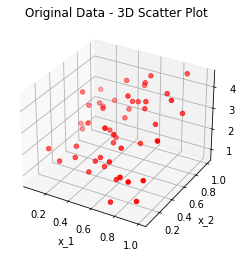

In [40]:
import matplotlib.pyplot as plt
import numpy as np

d = 2
m = 50
noise_intensity = 2

X = np.random.rand( m, d )
y = noise_intensity*(np.random.rand( m )-0.5)

def hp(x):
    w = np.array( [4,6,-2] )
    return (-w[0]*x[0]-w[1]*x[1])/w[2]

for i in range(m):
    y[i] += hp( X[i,:] )
    
### 3d scatter plot:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
plt.title('Original Data - 3D Scatter Plot')
plt.show()

Now, we want to find a hyperplane that fits our data by solving the least-squares problem above using the QR decomposition. 

**Task: Find the QR decomposition of $X$ using either your own QR method or the QR method from numpy. (1 point)**

*Hint: You only need the $n\times n$ part of the matrix $R$ if you are using your own QR. (skinny QR)*

In [35]:
X1= np.column_stack([np.ones(X.shape[0]), X])
Q, R = np.linalg.qr(X1)

**Task: Solve the minimization problem with the matrices $Q$ and $R$. Plot the original data again and the resulting hyperplane (from the solution vector $w$) using a 3d surface plot! (4 points)***

Hint: You can use `np.linalg.solve` to solve the problem and `plot_surface` to plot a 3d surface.

In [44]:
w = np.linalg.solve(R, np.matmul(np.transpose(Q), y))
w

array([2.12443641, 0.23959363, 0.67256602])

**Task: Check how the number of points $m$ and the noise intensity influence your result by manipulating the parameters and executing your code again! What do you observe? (2 points)**

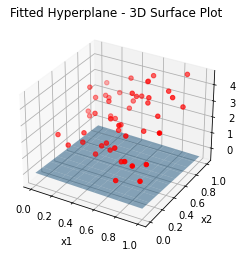

In [45]:
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz =  (-w[1]*xx-w[2]*yy)/w[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Fitted Hyperplane - 3D Surface Plot')
plt.show()

## (2) Nonlinear Models

Instead of using linear models, one can also use non-linear ansatz functions, e.g., polynomial or exponential fitting.

### (2.1) Polynomial ansatz functions
**Task:
Given the one-dimensional nodes `poly_x`$=(1, 2.5, 4, 5.3, 7)$ and function values `poly_y`$=(15, 17.625, 30, 40, 55)$,**
```
poly_x = np.array([1, 2.5, 4, 5.3, 7])
poly_y = np.array([15, 17.625, 30, 40, 55])
```
**perform a least-squares fit for the linear, quadratic, and cubic polynomial ansatz functions**
\begin{align}
p_1(x) &= a_1 x + a_0, \\
p_2(x) &= a_2 x^2 + a_1 x + a_0, \\
p_3(x) &= a_3 x^3 + a_2 x^2 + a_1 x + a_0,
\end{align}
**where the coefficients $a_i$ can be determined using the `numpy.linalg.lstsq` function.**

**Visualize the original data and the resulting least-squares fits in one plot. (4 points)**

In [20]:
poly_x = np.array([1, 2.5, 4, 5.3, 7])
X_linear = np.column_stack([poly_x, np.ones_like(poly_x)])
poly_y = np.array([15, 17.625, 30, 40, 55])
coeff_linear, _, _, _ = np.linalg.lstsq(X_linear, poly_y, rcond=None)

In [21]:
poly_x = np.array([1, 2.5, 4, 5.3, 7])
poly_y = np.array([15, 17.625, 30, 40, 55])
X_quadratic = np.column_stack([(poly_x)**2, poly_x, np.ones_like(poly_x)])
coeff_quadratic, _, _, _ = np.linalg.lstsq(X_quadratic, poly_y, rcond=None)

In [22]:
poly_x = np.array([1, 2.5, 4, 5.3, 7])
poly_y = np.array([15, 17.625, 30, 40, 55])
X_cubic = np.column_stack([(poly_x)**3, (poly_x)**2, poly_x, np.ones_like(poly_x)])
coeff_cubic, _, _, _ = np.linalg.lstsq(X_cubic, poly_y, rcond=None)

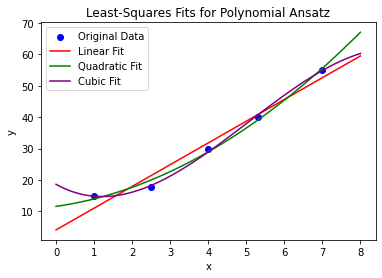

In [27]:
x_fit = np.linspace(0, 8, 100)
y_fit_linear = np.dot(np.column_stack([x_fit, np.ones_like(x_fit)]), coeff_linear)
y_fit_quadratic = np.dot(np.column_stack([x_fit**2, x_fit, np.ones_like(x_fit)]), coeff_quadratic)
y_fit_cubic = np.dot(np.column_stack([x_fit**3, x_fit**2, x_fit, np.ones_like(x_fit)]), coeff_cubic)

# Plotting the original data and the least-squares fits
plt.scatter(poly_x, poly_y, label='Original Data', color='blue')
plt.plot(x_fit, y_fit_linear, label='Linear Fit', color='red')
plt.plot(x_fit, y_fit_quadratic, label='Quadratic Fit', color='green')
plt.plot(x_fit, y_fit_cubic, label='Cubic Fit', color='purple')

plt.title('Least-Squares Fits for Polynomial Ansatz')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### (2.2) Exponential ansatz function
**Task:
Given the one-dimensional nodes `exp_x`$=(0, 0.5, 1, 1.5, 2)$ and function values `exp_y`$=(3, 1.6, 0.99, 0.46, 0.25)$,**
```
exp_x = np.array([0, 0.5, 1, 1.5, 2])
exp_y = np.array([3, 1.6, 0.99, 0.46, 0.25])
```
**perform a least-squares fit for the exponential ansatz function**
$$
f(x) = C \exp(a x)
$$
**where the coefficients $C$ and $a$ can be determined using the `numpy.linalg.lstsq` function.**

**Visualize the original data and the resulting least-squares fit in one plot. (2 points)**

In [23]:
exp_x = np.array([0, 0.5, 1, 1.5, 2])
exp_y = np.array([3, 1.6, 0.99, 0.46, 0.25])
X_exponential = np.column_stack([np.ones_like(exp_x), exp_x])
coeff_exponential, _, _, _ = np.linalg.lstsq(X_exponential, np.log(exp_y), rcond=None)

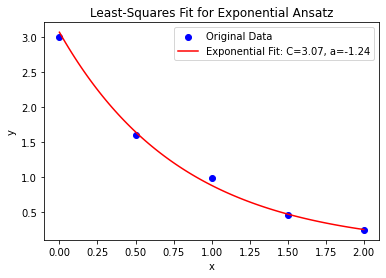

In [25]:
C_fit = np.exp(coeff_exponential[0])
a_fit = coeff_exponential[1]
def exponential_ansatz(x, C, a):
    return C * np.exp(a * x)

# Generate values for the fitted exponential function
x_fit = np.linspace(0, 2, 100)
y_fit = exponential_ansatz(x_fit, C_fit, a_fit)

# Plotting the original data and the least-squares fit
plt.scatter(exp_x, exp_y, label='Original Data', color='blue')
plt.plot(x_fit, y_fit, label=f'Exponential Fit: C={C_fit:.2f}, a={a_fit:.2f}', color='red')

plt.title('Least-Squares Fit for Exponential Ansatz')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## (3) Comparison of normal equation and QR decomposition for least squares


**Task:
Next, we want to compare solving least squares by the normal equation and by the QR decomposition for an ill-posed case.
Given the one-dimensional nodes `x`$=(1, 1.000000002, 1.000000004)$ and function values `b`$=(2, 2.0000000001, 2.0000000004)$,**
```
x = np.array([1,1.000000002,1.000000004])
b = np.array([2,2.0000000001,2.0000000004])
```
**perform a least-squares fit for the linear ansatz function**
$$
p_1(x) = a_1 x + a_0
$$
by solving the normal equation
$$
 A^\ast A \, \boldsymbol{x} = A^\ast \boldsymbol{b}
$$
**using the `numpy.linalg.solve` function. Compare the results with the least-squares fit obtained by the QR decomposition and the `numpy.linalg.lstsq` function.**

**Visualize the original data and the resulting least-squares fits in one plot. Why do we obtain different results? ( 4 points)**

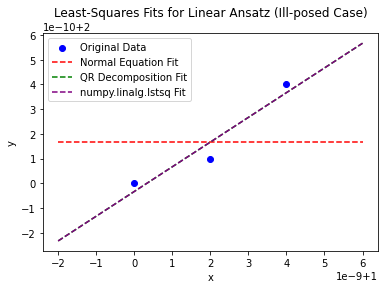

In [28]:

# Given data
x = np.array([1, 1.000000002, 1.000000004])
b = np.array([2, 2.0000000001, 2.0000000004])

# Linear ansatz function: p1(x) = a1*x + a0
A = np.column_stack([x, np.ones_like(x)])

# Solve using the normal equation
coeff_normal_eq = np.linalg.solve(A.T @ A, A.T @ b)

# Solve using QR decomposition
Q, R = np.linalg.qr(A)
coeff_qr = np.linalg.solve(R, Q.T @ b)

# Solve using numpy.linalg.lstsq
coeff_lstsq, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

# Generate values for the fitted linear function
x_fit = np.linspace(0.999999998, 1.000000006, 100)
y_fit_normal_eq = np.dot(np.column_stack([x_fit, np.ones_like(x_fit)]), coeff_normal_eq)
y_fit_qr = np.dot(np.column_stack([x_fit, np.ones_like(x_fit)]), coeff_qr)
y_fit_lstsq = np.dot(np.column_stack([x_fit, np.ones_like(x_fit)]), coeff_lstsq)

# Plotting the original data and the least-squares fits
plt.scatter(x, b, label='Original Data', color='blue')
plt.plot(x_fit, y_fit_normal_eq, label='Normal Equation Fit', linestyle='--', color='red')
plt.plot(x_fit, y_fit_qr, label='QR Decomposition Fit', linestyle='--', color='green')
plt.plot(x_fit, y_fit_lstsq, label='numpy.linalg.lstsq Fit', linestyle='--', color='purple')

plt.title('Least-Squares Fits for Linear Ansatz (Ill-posed Case)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [59]:
np.linalg.det(A.T @ A), np.linalg.eig(A.T@A)

(-1.3322676348792521e-15,
 (array([ 6.00000001e+00, -8.88178420e-16]),
  array([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]])))

In [ ]:
# Note that one of the eigenvalues is close to 0(we can also see from the determinant which is close to 0), 
# thus it becomes a ill posed problem, we need regularization to handle that(we need to add penalty term) 
# which is only provided by "np.linalg.lstsq" code hence it manages to generate a very good and stable solution, 
# whereas the other two codes work without any penalty/regularizing term and thereby behave very poorly against 
# ill posesd problem as above.